In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

 # 1. Data preprocessing and exploration

## 1.1. Importing libraries and dataset


In [2]:
dataset = pd.read_csv("sales.csv")


In [3]:
dataset.head()

City  Gender  Unit price  Quantity   Tax 5%     Total  Rating
0     Yangon  Female       74.69         7  26.1415  548.9715     9.1
1  Naypyitaw  Female       15.28         5   3.8200   80.2200     9.6
2     Yangon    Male       46.33         7  16.2155  340.5255     7.4
3     Yangon    Male       58.22         8  23.2880  489.0480     8.4
4     Yangon    Male       86.31         7  30.2085  634.3785     5.3

In [4]:
dataset.shape

(1000, 7)

In [5]:
dataset.tail()

City  Gender  Unit price  Quantity   Tax 5%      Total  Rating
995  Naypyitaw    Male       40.35         1   2.0175    42.3675     6.2
996   Mandalay  Female       97.38        10  48.6900  1022.4900     4.4
997     Yangon    Male       31.84         1   1.5920    33.4320     7.7
998     Yangon    Male       65.82         1   3.2910    69.1110     4.1
999     Yangon  Female       88.34         7  30.9190   649.2990     6.6

In [6]:
dataset.isnull().sum()

City          0
Gender        0
Unit price    0
Quantity      0
Tax 5%        0
Total         0
Rating        0
dtype: int64

## 1.2. Statistical description

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        1000 non-null   object 
 1   Gender      1000 non-null   object 
 2   Unit price  1000 non-null   float64
 3   Quantity    1000 non-null   int64  
 4   Tax 5%      1000 non-null   float64
 5   Total       1000 non-null   float64
 6   Rating      1000 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 54.8+ KB


In [8]:
dataset.describe()

Unit price     Quantity       Tax 5%        Total      Rating
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000
mean     55.672130     5.510000    15.379749   322.966749     6.97270
std      26.494628     2.923431    11.708621   245.885335     1.71858
min      10.080000     1.000000     0.508500    10.678500     4.00000
25%      32.875000     3.000000     5.924875   124.422375     5.50000
50%      55.230000     5.000000    12.088000   253.848000     7.00000
75%      77.935000     8.000000    22.445250   471.350250     8.50000
max      99.960000    10.000000    49.650000  1042.650000    10.00000

In [9]:
dataset.describe(include=['object'])

City  Gender
count     1000    1000
unique       3       2
top     Yangon  Female
freq       340     501

In [10]:
dataset['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [11]:
dataset['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

## 1.3. Boxplot

In [12]:
import seaborn as sns
sns.set(style='whitegrid')



In [13]:
sns.boxplot(data = dataset)
plt.show()

In [14]:
IQR = dataset['Quantity'].quantile(0.75)-dataset['Quantity'].quantile(0.25)

In [15]:
IQR

5.0

In [16]:
Inf = dataset['Quantity'].quantile(0.25)-1.5*IQR

In [17]:
Inf

-4.5

In [18]:
dataset[dataset['Quantity']<Inf].count()

City          0
Gender        0
Unit price    0
Quantity      0
Tax 5%        0
Total         0
Rating        0
dtype: int64

In [19]:
Sup = dataset['Quantity'].quantile(0.75)+1.5*IQR

In [20]:
Sup

15.5

## 1.4. Scatter Plot


In [21]:
sns.set(style='ticks')
sns.pairplot(dataset)
plt.show()

# Correlation

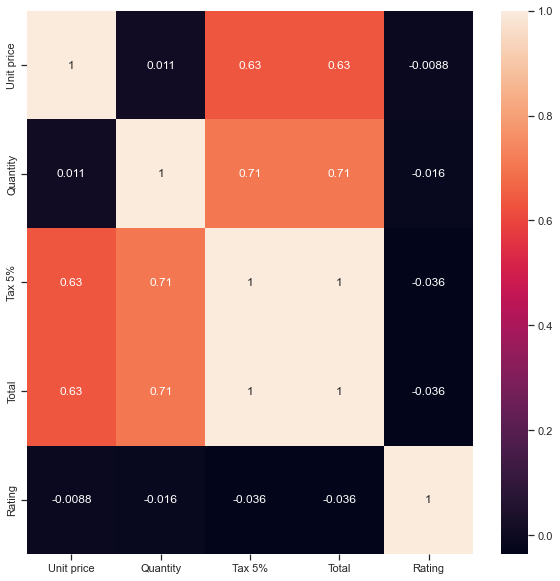

In [22]:
correlations = dataset.corr(method='pearson')
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, annot = True)
plt.show()

## 1.6. Encoding categorical data

In [23]:
X = dataset.iloc[:,:].values

In [24]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [25]:
X[:,0] = label.fit_transform(X[:,0])
X[:,1] = label.fit_transform(X[:,1])

In [26]:
X[0:10,:]

array([[2, 0, 74.69, 7, 26.1415, 548.9715, 9.1],
       [1, 0, 15.28, 5, 3.82, 80.22, 9.6],
       [2, 1, 46.33, 7, 16.2155, 340.5255, 7.4],
       [2, 1, 58.22, 8, 23.288, 489.048, 8.4],
       [2, 1, 86.31, 7, 30.2085, 634.3785, 5.3],
       [1, 1, 85.39, 7, 29.8865, 627.6165, 4.1],
       [2, 0, 68.84, 6, 20.652, 433.692, 5.8],
       [1, 0, 73.56, 10, 36.78, 772.38, 8.0],
       [2, 0, 36.26, 2, 3.626, 76.146, 7.2],
       [0, 0, 54.84, 3, 8.226, 172.746, 5.9]], dtype=object)

## Independent variables and labels

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaler)

In [29]:
print(pca.explained_variance_ratio_)

[4.20042863e-01 1.50994513e-01 1.49451240e-01 1.36432414e-01
 1.32305414e-01 1.07735192e-02 3.69514462e-08]


In [30]:
print(sum(pca.explained_variance_ratio_[:2]))

0.5710373759811742


In [31]:
X_pca.shape

(1000, 7)

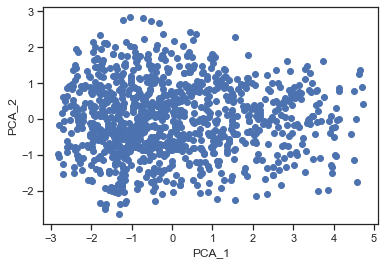

In [32]:
plt.scatter(X_pca[:,0],X_pca[:,1])
for label,x,y in zip([],X_pca[:,0],X_pca[:,1]):
    plt.annotate(label,xy=(x,y))

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

## Principal Component Analysis et Standarization

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaler)

In [35]:
print(pca.explained_variance_ratio_)

[4.20042863e-01 1.50994513e-01 1.49451240e-01 1.36432414e-01
 1.32305414e-01 1.07735192e-02 3.69514462e-08]


In [36]:
print(sum(pca.explained_variance_ratio_[:2]))

0.5710373759811742


In [37]:
X_pca.shape

(1000, 7)

## Visualization 

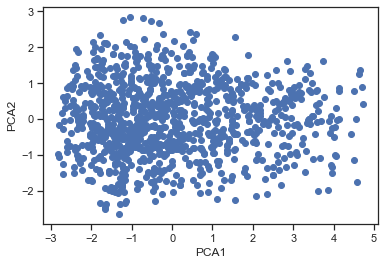

In [39]:
plt.scatter(X_pca[:,0],X_pca[:,1])
for label,x,y in zip([],X_pca[:,0],X_pca[:,1]):
    plt.annotate(label,xy=(x,y))

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

 # KMeans Clustering
 

## Make KMeans

In [40]:
from sklearn.cluster import KMeans

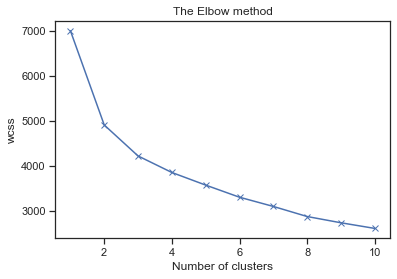

In [41]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, 'bx-')
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [42]:
pip install kneed


Note: you may need to restart the kernel to use updated packages.


In [43]:
from kneed import KneeLocator
k = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
k.elbow

3

In [44]:
k.plot_knee()
plt.show()

In [45]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeans.fit(X_pca)
y_kmeans = kmeans.labels_

In [46]:
y_kmeans

array([2, 0, 1, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 1,
       1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2,
       1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1,
       1, 2, 0, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2,
       0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 0, 2, 0,
       1, 2, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0,
       1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1,
       1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1,

## Clusters Visualization

In [47]:
plt.scatter(X_pca[y_kmeans==0,0],X_pca[y_kmeans==0,1],c='red',label='Cluster 0')
plt.scatter(X_pca[y_kmeans==1,0],X_pca[y_kmeans==1,1],c='blue',label='Cluster 1')
plt.scatter(X_pca[y_kmeans==2,0],X_pca[y_kmeans==2,1],c='green',label='Cluster 2')

for label,x,y in zip([],X_pca[:,0],X_pca[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clustering')
plt.legend()
plt.show()

## Profiling

In [48]:
kmeans.cluster_centers_.shape

(3, 7)

In [49]:
dataset.columns

Index(['City', 'Gender', 'Unit price', 'Quantity', 'Tax 5%', 'Total',
       'Rating'],
      dtype='object')

In [50]:
col_names = ['City','Gender','Unit price','Quantity','Tax 5%','Total','Rating']

In [51]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = col_names)
cluster_centers

City    Gender  Unit price  Quantity    Tax 5%     Total    Rating
0 -0.847443  0.735117    0.386333 -0.279308  0.563476 -0.033637  0.000009
1 -0.998752 -0.679955   -0.338269  0.249557 -0.539449 -0.030891 -0.000007
2  2.231796 -0.025500   -0.036967  0.020551  0.003007  0.077773 -0.000002

In [52]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = col_names)
cluster_centers

City    Gender  Unit price  Quantity     Tax 5%       Total    Rating
0  0.313337  0.866558   65.902748  4.693871  21.973982  314.700013  6.972716
1  0.189306  0.159023   46.714294  6.239199   9.066703  315.374892  6.972687
2  2.837441  0.486250   54.693200  5.570050  15.414944  342.080320  6.972697

In [53]:
dataset.describe()

Unit price     Quantity       Tax 5%        Total      Rating
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000
mean     55.672130     5.510000    15.379749   322.966749     6.97270
std      26.494628     2.923431    11.708621   245.885335     1.71858
min      10.080000     1.000000     0.508500    10.678500     4.00000
25%      32.875000     3.000000     5.924875   124.422375     5.50000
50%      55.230000     5.000000    12.088000   253.848000     7.00000
75%      77.935000     8.000000    22.445250   471.350250     8.50000
max      99.960000    10.000000    49.650000  1042.650000    10.00000

In [54]:
dataset_cluster = pd.concat([dataset, pd.DataFrame({'Cluster': y_kmeans})], axis=1)
dataset_cluster.head()

City  Gender  Unit price  Quantity   Tax 5%     Total  Rating  Cluster
0     Yangon  Female       74.69         7  26.1415  548.9715     9.1        2
1  Naypyitaw  Female       15.28         5   3.8200   80.2200     9.6        0
2     Yangon    Male       46.33         7  16.2155  340.5255     7.4        1
3     Yangon    Male       58.22         8  23.2880  489.0480     8.4        2
4     Yangon    Male       86.31         7  30.2085  634.3785     5.3        2

In [55]:
X = dataset_cluster.iloc[:,:7].values
y = dataset_cluster.iloc[:,7].values

In [56]:
X[:,0] = label.fit_transform(X[:,0])
X[:,1] = label.fit_transform(X[:,1])
X[:10,:]

array([[2, 0, 74.69, 7, 26.1415, 548.9715, 9.1],
       [1, 0, 15.28, 5, 3.82, 80.22, 9.6],
       [2, 1, 46.33, 7, 16.2155, 340.5255, 7.4],
       [2, 1, 58.22, 8, 23.288, 489.048, 8.4],
       [2, 1, 86.31, 7, 30.2085, 634.3785, 5.3],
       [1, 1, 85.39, 7, 29.8865, 627.6165, 4.1],
       [2, 0, 68.84, 6, 20.652, 433.692, 5.8],
       [1, 0, 73.56, 10, 36.78, 772.38, 8.0],
       [2, 0, 36.26, 2, 3.626, 76.146, 7.2],
       [0, 0, 54.84, 3, 8.226, 172.746, 5.9]], dtype=object)

## 1.7. Splitting dataset into train and test sets

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,\
                                                random_state=0)

In [58]:
X_train.shape

(800, 7)

In [59]:
X_test.shape

(200, 7)

In [60]:
y.mean()

0.948

In [61]:
print(y_train.mean())
print(y_test.mean())

0.95
0.94


## 1.8. Feature scaling

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
X_train[0,:]

array([2, 1, 63.56, 10, 31.78, 667.38, 4.3], dtype=object)

In [66]:
X_train_sc[0,:]

array([ 1.20246793,  1.00250313,  0.28613823,  1.53272506,  1.40215666,
        1.40216157, -1.59529433])

In [67]:
(667 - X_train[:,2].mean())/(X_train[:,2].std())

23.21477503523976

In [68]:
scaler.inverse_transform(X_train_sc[0,:])

array([  2.  ,   1.  ,  63.56,  10.  ,  31.78, 667.38,   4.3 ])

# 2. k Nearest Neighbors

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [70]:
knn.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [71]:
y_pred_knn = knn.predict(X_test_sc)

In [72]:
for i in range(10):
    print(y_test[i], y_pred_knn[i])

1 1
2 2
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 0


In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [74]:
print('Confusion matrix knn \n', confusion_matrix(y_test,y_pred_knn))
print('Accuracy knn', accuracy_score(y_test,y_pred_knn))

Confusion matrix knn 
 [[70  0  1]
 [ 0 68  2]
 [ 1  0 58]]
Accuracy knn 0.98


In [75]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       1.00      0.97      0.99        70
           2       0.95      0.98      0.97        59

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [76]:
from sklearn.metrics import precision_score, recall_score

In [77]:
print('Recall knn', recall_score(y_test,y_pred_knn,average='micro'))
print('Precision knn', precision_score(y_test,y_pred_knn,average='micro'))

Recall knn 0.98
Precision knn 0.98


In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       1.00      0.97      0.99        70
           2       0.95      0.98      0.97        59

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



**Grid search**

In [80]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : [1,3,5,7,9,11,13]}
model = KNeighborsClassifier()
clf = GridSearchCV(model,parameters, scoring='accuracy', cv=5)
grille = clf.fit(X_train_sc,y_train)
print(grille.best_params_)
print(grille.best_score_)

{'n_neighbors': 13}
0.9650000000000001


In [81]:
y_pred_knn_o = grille.predict(X_test_sc)

In [82]:
print('Confusion matrix knn op \n', confusion_matrix(y_test,y_pred_knn_o))
print('Accuracy knn op', accuracy_score(y_test,y_pred_knn_o))
print('Recall knn op', recall_score(y_test,y_pred_knn_o,average=None))
print('Precision knn op', precision_score(y_test,y_pred_knn_o,average=None))

Confusion matrix knn op 
 [[71  0  0]
 [ 0 70  0]
 [ 3  0 56]]
Accuracy knn op 0.985
Recall knn op [1.         1.         0.94915254]
Precision knn op [0.95945946 1.         1.        ]


# 3. Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [84]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
y_pred_dt = dt.predict(X_test)

In [86]:
for i in range(10):
    print(y_test[i],y_pred_dt[i])

1 1
2 2
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 0


In [87]:
print('Confusion matrix dt \n', confusion_matrix(y_test,y_pred_dt))
print('Accuracy dt', accuracy_score(y_test,y_pred_dt))
print('Recall dt', recall_score(y_test,y_pred_dt,average= None))
print('Precision dt', precision_score(y_test,y_pred_dt,average= None))

Confusion matrix dt 
 [[70  0  1]
 [ 0 70  0]
 [ 1  0 58]]
Accuracy dt 0.99
Recall dt [0.98591549 1.         0.98305085]
Precision dt [0.98591549 1.         0.98305085]


In [88]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       1.00      1.00      1.00        70
           2       0.98      0.98      0.98        59

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



In [89]:
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X,y)

DecisionTreeClassifier(max_depth=5)

In [91]:
features = ['City','Gender','Unit price','Quantity','Tax 5%','Total','Rating']

In [92]:
tree.export_graphviz(model,feature_names = features,\
                    out_file = 'dt_cdoss.dot',\
                    label = 'all',\
                    filled = True,\
                    rounded = True)

In [94]:
from IPython.display import Image

In [97]:
Image(dt_malek.png)

NameError: name 'dt_malek' is not defined

# Agglomerative Hierarchical Clustering 


In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_pca,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
hc.fit(X_scaler)
y_hc = hc.labels_

In [ ]:
y_hc

In [ ]:
plt.scatter(X_pca[y_hc==0,0],X_pca[y_hc==0,1],c='red',label='Cluster 0')
plt.scatter(X_pca[y_hc==1,0],X_pca[y_hc==1,1],c='blue',label='Cluster 1')
for label,x,y in zip(labels,X_pca[:,0],X_pca[:,1]):
    plt.annotate(label,xy=(x,y))
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Hierachical Clustering')
plt.legend()
plt.show()